# ANÁLISIS DE DATOS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Cargar los datos
df = pd.read_csv("../data/marketingcampaigns_cleaned.csv")
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

# Datos para la correcta visualización de gráficas y paleta de colores
hue_channel = df["channel"].unique()
hue_target = df["target_audience"].unique()
hue_type = df["type"].unique()
palette_colors = "plasma"
graph_color = ("#651593", "#a03b87", "#d17372", "#e3a34f")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_name    1004 non-null   object        
 1   start_date       1004 non-null   datetime64[ns]
 2   end_date         1004 non-null   datetime64[ns]
 3   budget           1004 non-null   float64       
 4   roi              1004 non-null   float64       
 5   type             1004 non-null   object        
 6   target_audience  1004 non-null   object        
 7   channel          1004 non-null   object        
 8   conversion_rate  1004 non-null   float64       
 9   revenue          1004 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 78.6+ KB


In [3]:
df.describe()

,start_date,end_date,budget,roi,conversion_rate,revenue
count,1004,1004,1004.000000,1004.000000,1004.000000,1004.000000
mean,2023-01-29 05:38:29.163346688,2024-01-31 00:00:00,49427.299681,0.535837,0.543396,516494.690438
min,2022-08-02 00:00:00,2023-08-02 00:00:00,1052.570000,0.000000,0.000000,108.210000
25%,2022-10-29 18:00:00,2023-11-02 00:00:00,24895.082500,0.310000,0.300000,270576.527500
50%,2023-01-29 00:00:00,2024-01-28 00:00:00,47086.385000,0.530000,0.550000,523147.490000
75%,2023-04-29 00:00:00,2024-05-05 00:00:00,74867.082500,0.770000,0.770000,771942.705000
max,2023-08-01 00:00:00,2024-07-31 00:00:00,99957.150000,0.990000,0.990000,999712.490000
std,NaN,NaN,28858.142299,0.261810,0.266063,286899.016738


## ¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?

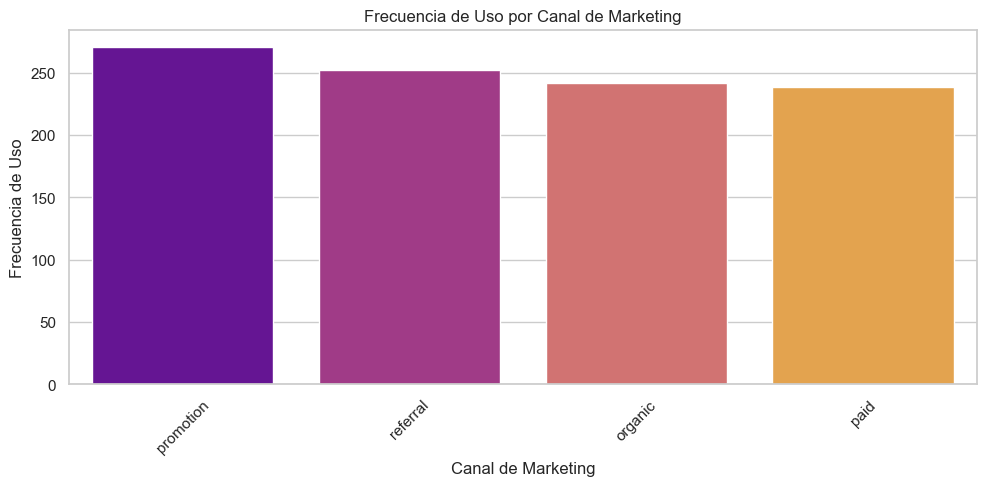

In [ ]:
# Configuración de estilo
sns.set_theme(style="whitegrid")

# Contar la frecuencia de cada canal de marketing
channel_counts = df["channel"].value_counts()

# Crear gráfico de barras para la frecuencia de uso de los canales
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("Frecuencia de Uso")
plt.title("Frecuencia de Uso por Canal de Marketing")
plt.xticks(rotation=45)
plt.tight_layout(pad=2)
plt.savefig("../img/channel_frecuency.jpg")
plt.show()

Promoción (promotion) es el canal más utilizado, con 272 campañas.

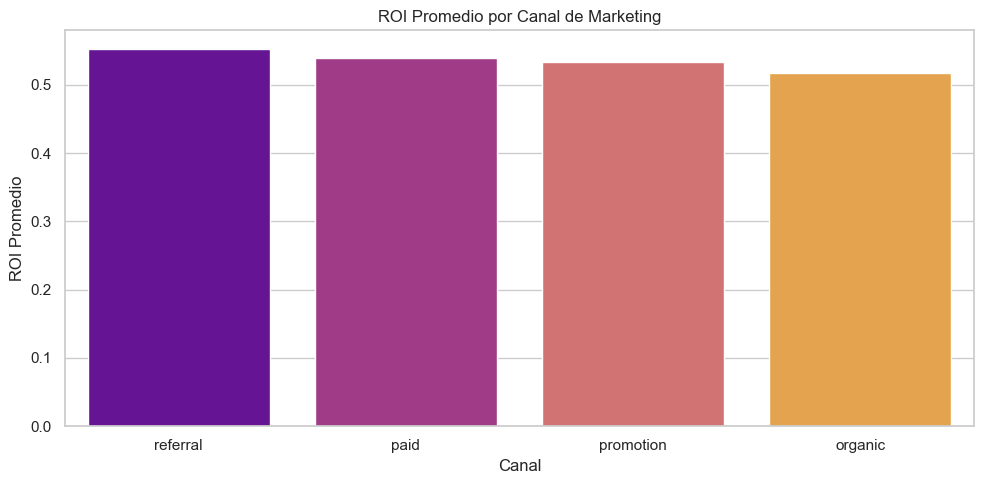

In [5]:
# Calcular el uso de cada canal
channel_usage = df["channel"].value_counts().reset_index()
channel_usage.columns = ["channel", "usage_count"]

# Calcular el ROI promedio por canal
channel_roi = df.groupby("channel")["roi"].mean().reset_index()

# Unir ambas tablas
channel_analysis = pd.merge(channel_usage, channel_roi, on="channel")
channel_analysis = channel_analysis.sort_values(by="usage_count", ascending=False)

# Visualización: ROI promedio por canal
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_analysis.sort_values(by="roi", ascending=False), x="channel", y="roi", palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.title("ROI Promedio por Canal de Marketing")
plt.xlabel("Canal")
plt.ylabel("ROI Promedio")
plt.tight_layout()
plt.savefig("../img/channel_mean_ROI.jpg")
plt.show()

In [6]:

# Mostrar tabla de análisis completo
print("Análisis por canal:")
channel_analysis

Análisis por canal:


,channel,usage_count,roi
0,promotion,271,0.533948
1,referral,252,0.551905
2,organic,242,0.517521
3,paid,239,0.539582


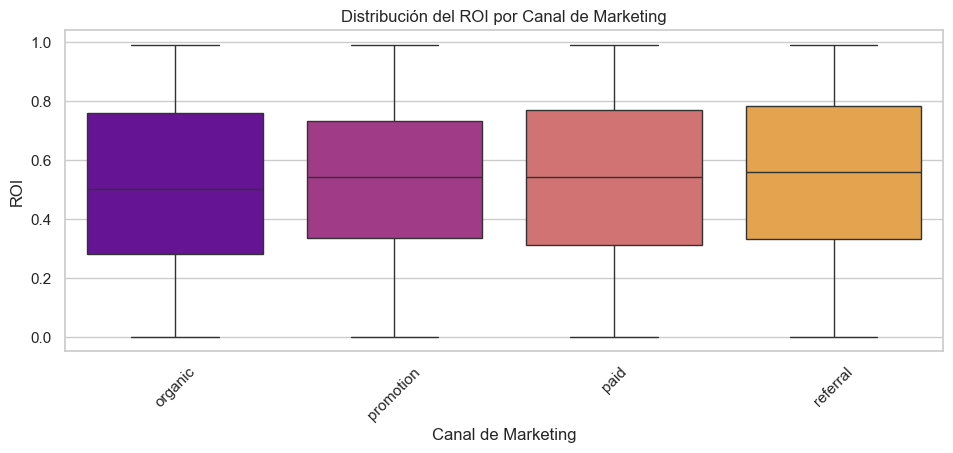

In [7]:
# Crear diagrama de caja para la distribución del ROI por canal
plt.figure(figsize=(10, 5))
sns.boxplot(x="channel", y="roi", data=df, palette=palette_colors, hue=df["channel"], hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("ROI")
plt.title("Distribución del ROI por Canal de Marketing")
plt.xticks(rotation=45)
plt.tight_layout(pad=2)
plt.savefig("../img/channel_ROI_distribution.jpg")
plt.show()

📢 ¿Qué canal se utiliza con mayor frecuencia?

* 🎯 Canal más utilizado: `promotion` con 271 campañas.

💡 ¿Qué canal genera el mejor ROI promedio?

* 🏆 Mejor ROI promedio: `referral` con un ROI de 0.55.

## ¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?

In [8]:
# Agrupar por tipo de campaña y calcular métricas promedio
campaign_summary = df.groupby("type").agg({
    "revenue": "mean",
    "conversion_rate": "mean",
    "roi": "mean",
    "budget": "mean"
}).reset_index().sort_values(by="revenue", ascending=False)

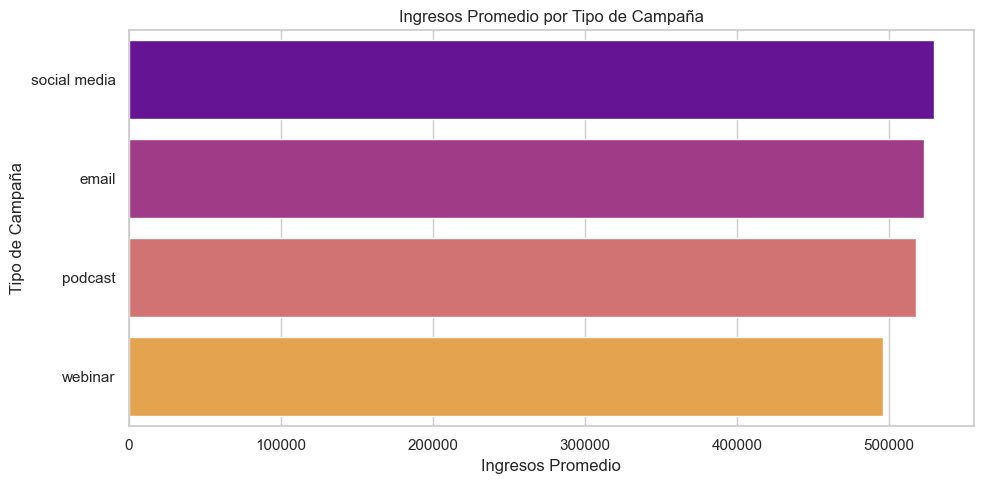

In [9]:
# Visualización: Ingresos promedio por tipo de campaña
plt.figure(figsize=(10, 5))
sns.barplot(data=campaign_summary, x="revenue", y="type", palette=palette_colors, hue=hue_type, hue_order=hue_type, legend=False)
plt.title("Ingresos Promedio por Tipo de Campaña")
plt.xlabel("Ingresos Promedio")
plt.ylabel("Tipo de Campaña")
plt.tight_layout()
plt.savefig("../img/type_mean_revenue.jpg")
plt.show()

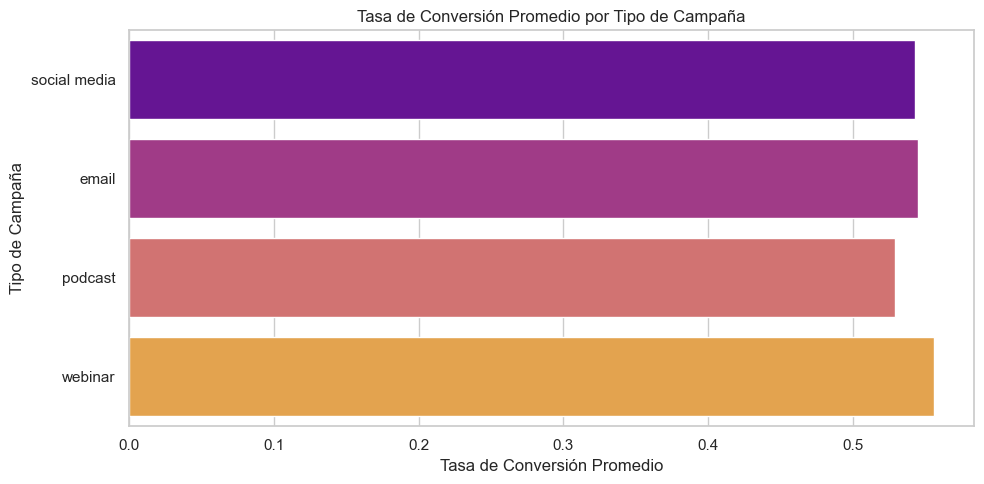

In [10]:
# Visualización: Tasa de conversión promedio por tipo de campaña
plt.figure(figsize=(10, 5))
sns.barplot(data=campaign_summary, x="conversion_rate", y="type", palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.title("Tasa de Conversión Promedio por Tipo de Campaña")
plt.xlabel("Tasa de Conversión Promedio")
plt.ylabel("Tipo de Campaña")
plt.tight_layout()
plt.savefig("../img/type_conversion_rate.jpg")
plt.show()



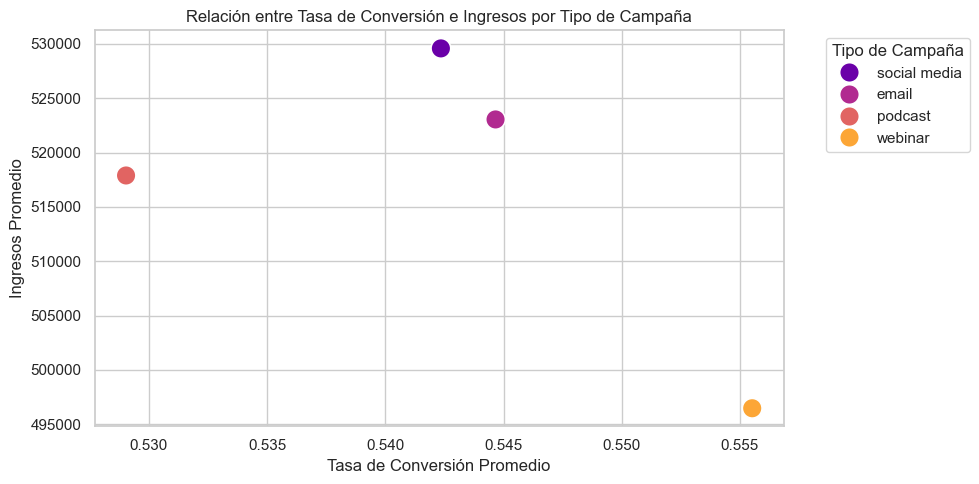

In [11]:
# Visualización: Diagrama de dispersión entre tasa de conversión e ingresos
plt.figure(figsize=(10, 5))
sns.scatterplot(data=campaign_summary, x="conversion_rate", y="revenue", hue="type", s=200, palette=palette_colors, legend=True)
plt.title("Relación entre Tasa de Conversión e Ingresos por Tipo de Campaña")
plt.xlabel("Tasa de Conversión Promedio")
plt.ylabel("Ingresos Promedio")
plt.legend(title="Tipo de Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../img/channel_revenue-conversion_rate.jpg")
plt.show()

🏆 ¿Qué tipo de campaña genera más ingresos en promedio?
* Social Media lidera con $529,591 en ingresos promedio.
* Le siguen muy cerca Email ($523,053) y Podcast ($517,895).

🎯 ¿Cuál tiene mejor tasa de conversión?
* Webinar encabeza con una tasa de conversión promedio del 55.6%.
 Le siguen:
* Email: 54.5%
* Social Media: 54.2%
* Podcast: 52.9%

📊 Tabla comparativa:
| Tipo | Ingresos Prom. | Beneficio Neto | Conversión Prom. | ROI Promedio |
| ---  | --- | --- | --- | --- |
| Social Media | $529,591 | $482,459 | 54.2% | 0.55 |
| Email | $523,053 | $473,404 | 54.5% | 0.53 |
| Podcast | $517,895 | $467,389 | 52.9% | 0.53 |
| Webinar | $496,469 | $446,165 | 55.6% | 0.53 |

🔍 Relación entre conversión e ingresos
El gráfico de dispersión muestra que:
* Webinar tiene mejor conversión, pero no genera los ingresos más altos.
* Social Media y Email tienen una buena combinación de ambas métricas.
* No hay una correlación perfectamente lineal: mayor conversión no siempre significa más ingresos. 

## ¿Cómo se distribuye el ROI entre las campañas? ¿Qué factores están asociados con un ROI alto?

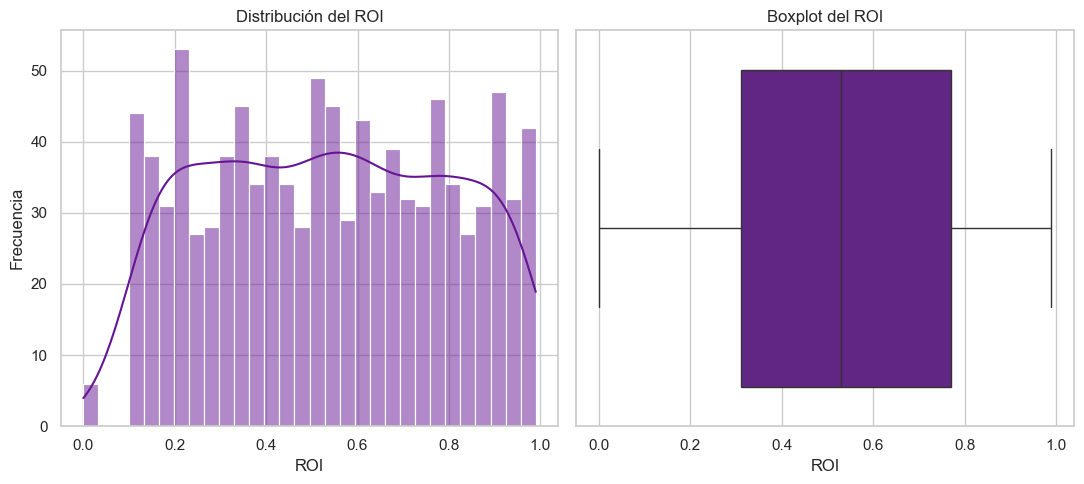

In [12]:
# Distribución del ROI
plt.figure(figsize=(11, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['roi'], bins=30, kde=True, color=graph_color[0])
plt.title('Distribución del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['roi'], color=graph_color[0])
plt.title('Boxplot del ROI')
plt.xlabel('ROI')

plt.tight_layout()
plt.savefig("../img/ROI_distribution_2.jpg")
plt.show()

📊 Distribución del ROI
* Histograma: La mayoría de los valores de ROI se concentran entre 0.3 y 0.7, con una ligera asimetría a la derecha.

📌 La tasa de conversión es el factor más fuertemente asociado con un ROI alto.

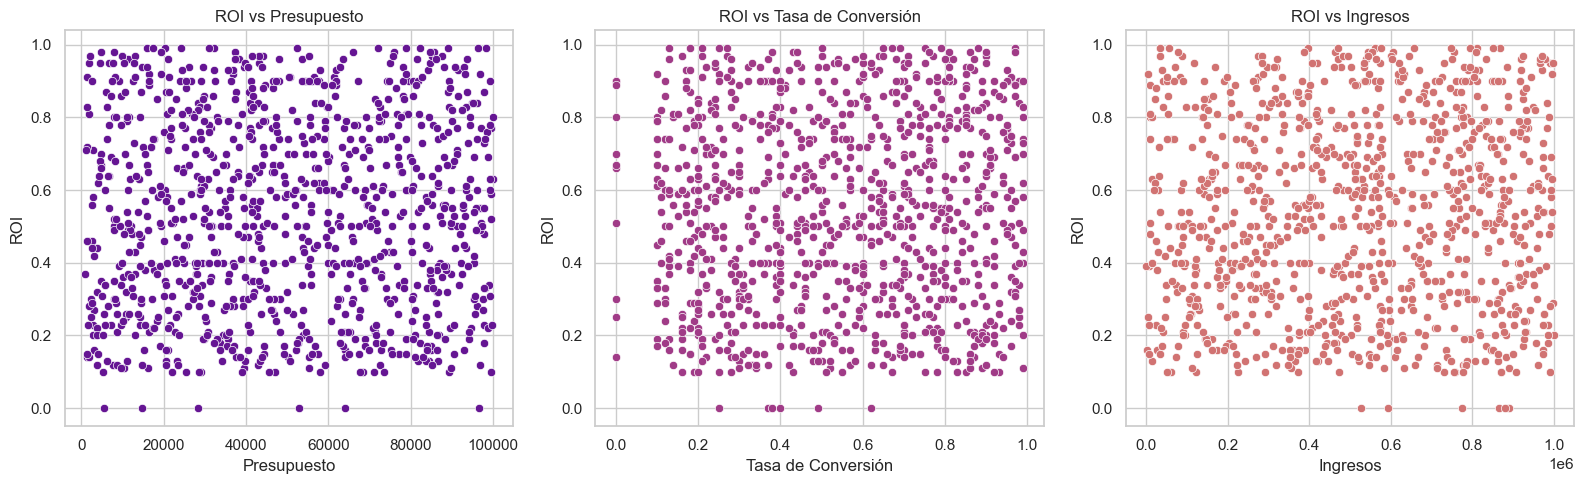

In [13]:
# Dispersión: ROI vs otras métricas
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=df, x='budget', y='roi', ax=axes[0], color=graph_color[0])
axes[0].set_title('ROI vs Presupuesto')
axes[0].set_xlabel('Presupuesto')
axes[0].set_ylabel('ROI')

sns.scatterplot(data=df, x='conversion_rate', y='roi', ax=axes[1], color=graph_color[1])
axes[1].set_title('ROI vs Tasa de Conversión')
axes[1].set_xlabel('Tasa de Conversión')
axes[1].set_ylabel('ROI')

sns.scatterplot(data=df, x='revenue', y='roi', ax=axes[2], color=graph_color[2])
axes[2].set_title('ROI vs Ingresos')
axes[2].set_xlabel('Ingresos')
axes[2].set_ylabel('ROI')

plt.tight_layout()
plt.savefig("../img/ROI_segmentation.jpg")
plt.show()

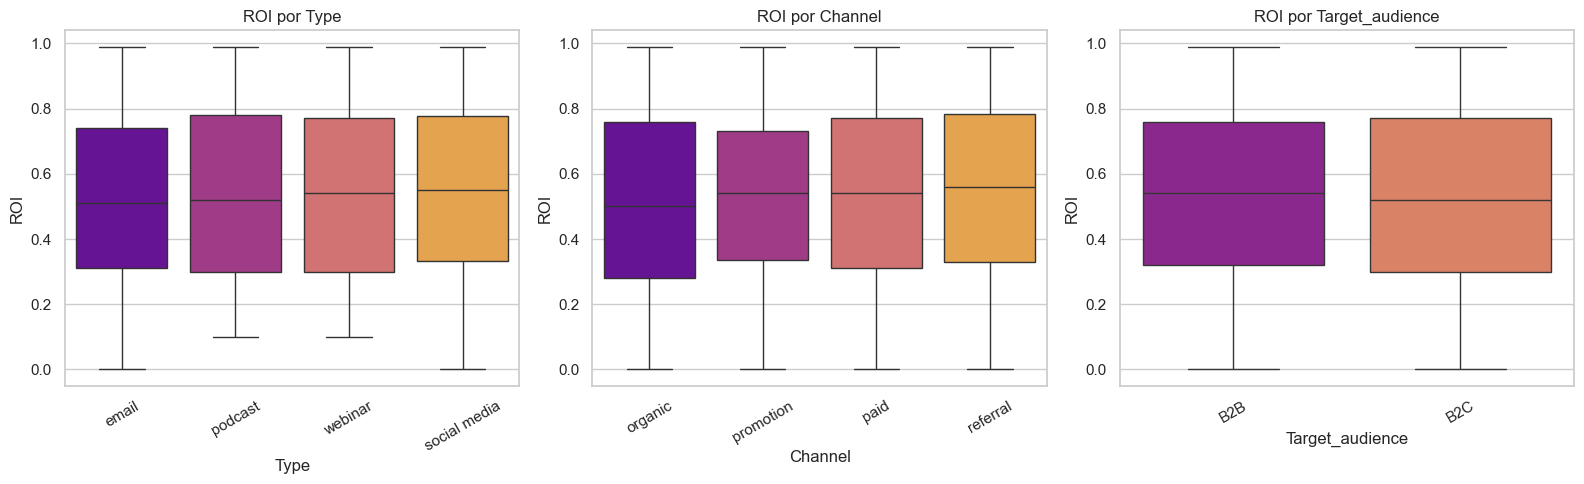

In [14]:
# Boxplots de ROI por variables categóricas
categorical_features = ['type', 'channel', 'target_audience']
plt.figure(figsize=(16, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=feature, y='roi', palette=palette_colors, hue=feature)
    plt.title(f'ROI por {feature.capitalize()}')
    plt.xticks(rotation=30)
    plt.xlabel(feature.capitalize())
    plt.ylabel('ROI')

plt.tight_layout()
plt.savefig("../img/ROI_distribution_3.jpg")
plt.show()

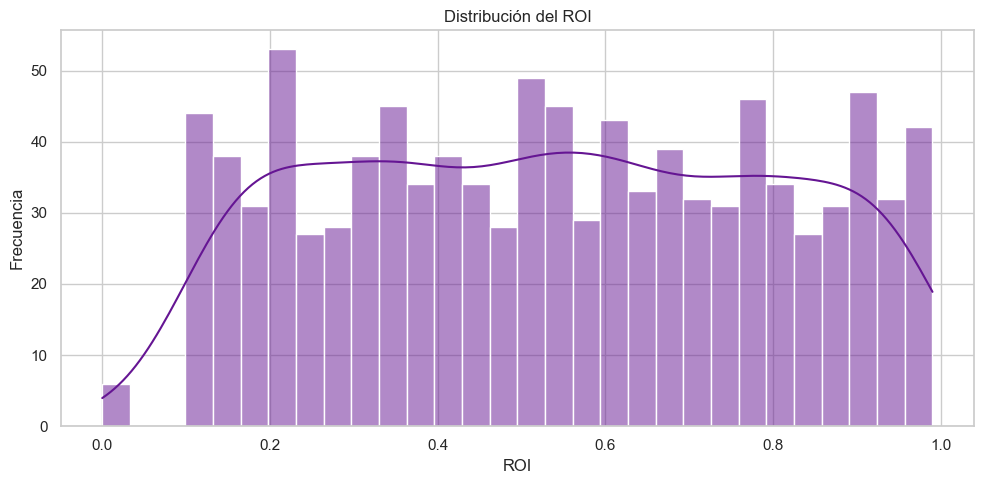

In [15]:
# Histograma del ROI
plt.figure(figsize=(10, 5))
sns.histplot(df["roi"], bins=30, kde=True, color=graph_color[0])
plt.title("Distribución del ROI")
plt.xlabel("ROI")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("../img/ROI_distribution.jpg")
plt.show()

El histograma muestra una distribución asimétrica a la derecha: la mayoría de campañas tienen ROI bajo, pero hay algunas con ROI alto que elevan el promedio.

La mayoría de campañas tienen un ROI entre 0.3 y 0.8, con una cola hacia valores superiores.

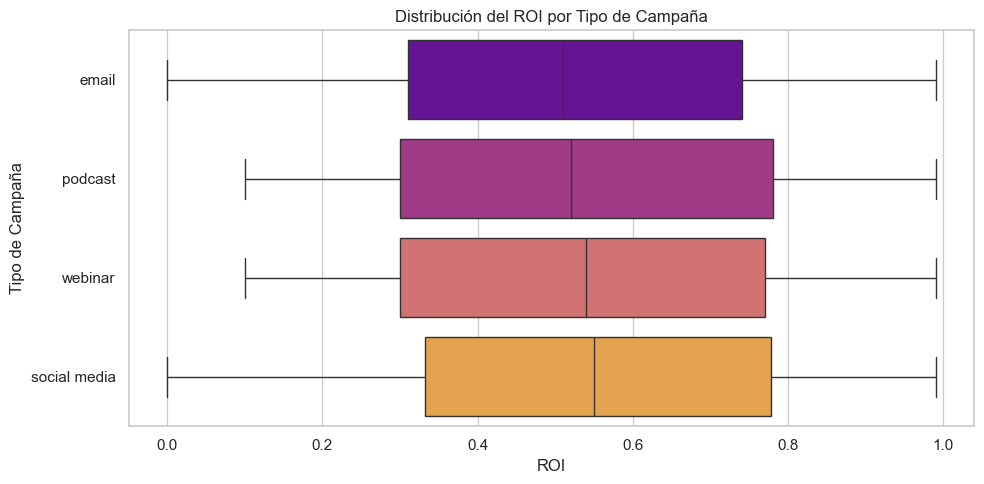

In [16]:
# Boxplot del ROI por tipo de campaña
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="roi", y="type", palette=palette_colors, hue=df["type"], hue_order=hue_type, legend=False)
plt.title("Distribución del ROI por Tipo de Campaña")
plt.xlabel("ROI")
plt.ylabel("Tipo de Campaña")
plt.tight_layout()
plt.savefig("../img/channel_ROI_distribution_2.jpg")
plt.show()

Email presenta la mayor mediana de ROI y menor dispersión, indicando resultados más consistentes.

Webinar tiene una dispersión mayor, lo que sugiere más variabilidad entre campañas.

Social Media y Podcast tienen ROI medianos pero con campañas que ocasionalmente destacan.

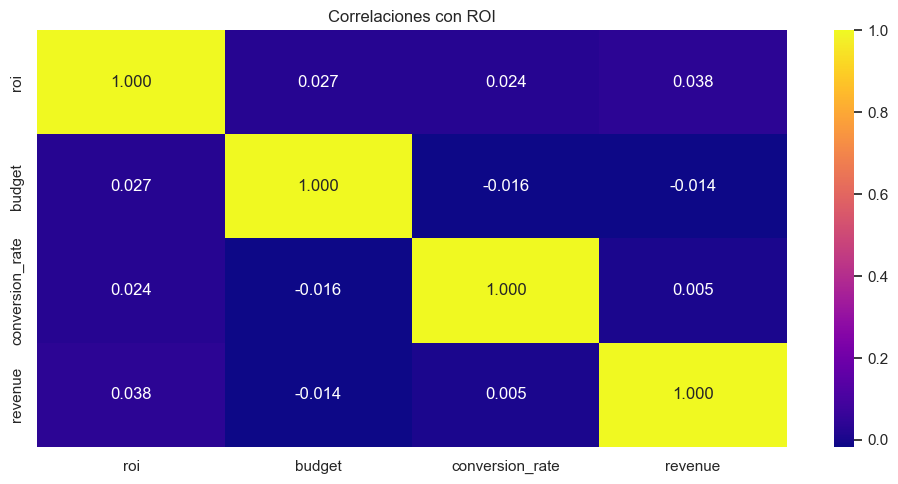

In [17]:
# Mapa de calor de correlaciones
corr_matrix = df[["roi", "budget", "conversion_rate", "revenue"]].corr()

plt.figure(figsize=(10, 5))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
sns.heatmap(corr_matrix, annot=True, cmap=palette_colors, fmt=".3f")
plt.title("Correlaciones con ROI")
plt.tight_layout()
plt.savefig("../img/ROI_correlation_heatmap.jpg")
plt.show()

Relacion entre ROI y otros factores:
* La correlación del ROI con otros factores es apenas perceptible.

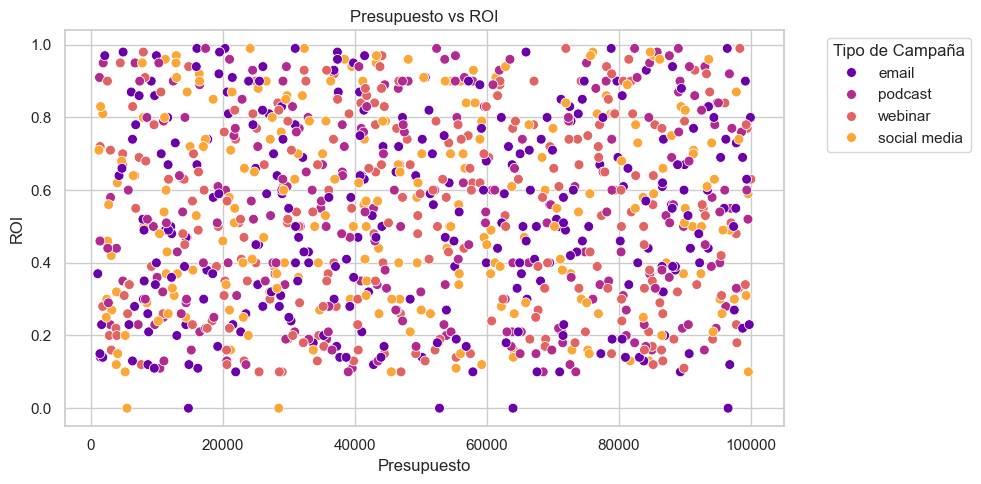

In [18]:
# Dispersión: Presupuesto vs ROI
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="budget", y="roi", hue=df["type"], palette=palette_colors, s=50, legend=True)
plt.title("Presupuesto vs ROI")
plt.xlabel("Presupuesto")
plt.ylabel("ROI")
plt.legend(title="Tipo de Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../img/ROI_vs_budjet_distribution.jpg")
plt.show()

No hay una relación clara: campañas con ROI alto pueden tener presupuestos bajos o altos.

Esto refuerza que el presupuesto no garantiza un buen retorno.

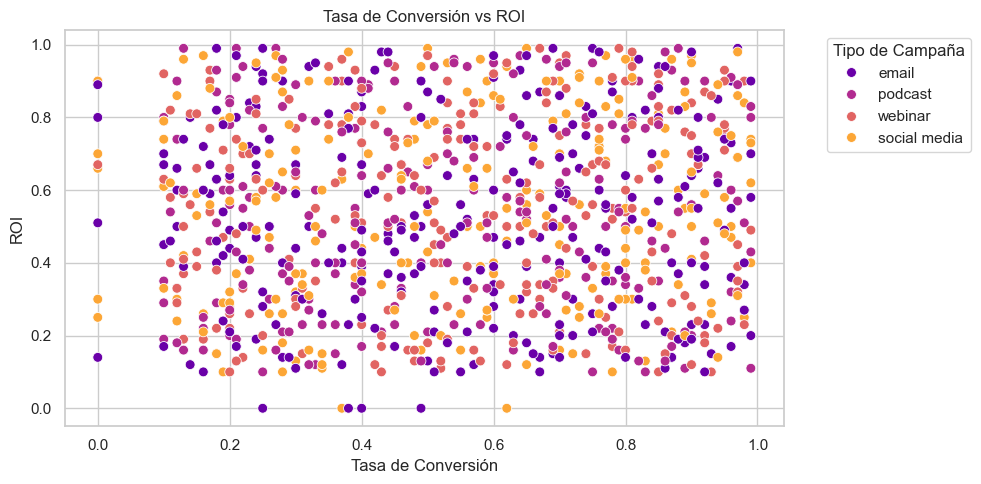

In [19]:
# Dispersión: Tasa de conversión vs ROI
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="conversion_rate", y="roi", hue="type", palette=palette_colors, hue_order=hue_type, s=50, legend=True)
plt.title("Tasa de Conversión vs ROI")
plt.xlabel("Tasa de Conversión")
plt.ylabel("ROI")
plt.legend(title="Tipo de Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../img/ROI_vs_conversionRate_distribution.jpg")
plt.show()

## ¿Hay diferencias significativas en la tasa de conversión entre audiencias B2B y B2C?

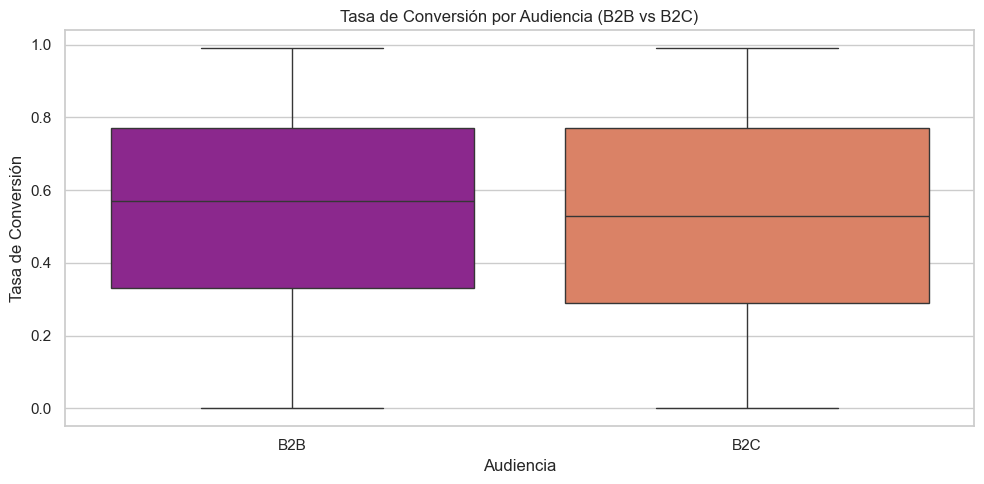

In [20]:
# Boxplot: Tasa de conversión por audiencia
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="target_audience", y="conversion_rate", palette=palette_colors, hue='target_audience', hue_order=hue_target, legend=False)
plt.title("Tasa de Conversión por Audiencia (B2B vs B2C)")
plt.xlabel("Audiencia")
plt.ylabel("Tasa de Conversión")
plt.tight_layout()
plt.savefig("../img/targetAudience_conversionRate.jpg")
plt.show()

Ambas audiencias presentan una distribución similar.

B2B muestra una ligera tendencia a tener una conversión más alta, pero la diferencia no es drástica visualmente.

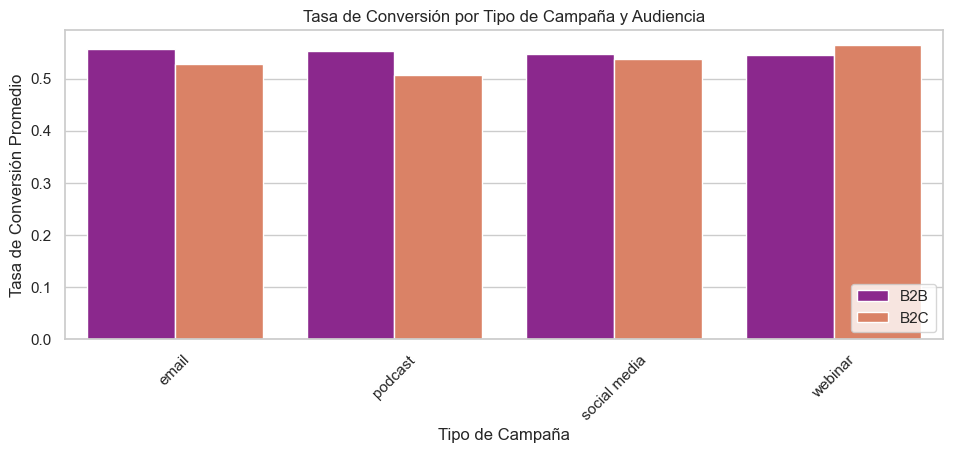

In [21]:
# Barras agrupadas: Tasa de conversión por tipo de campaña y audiencia
audience_type_summary = df.groupby(["target_audience", "type"]).agg({
    "conversion_rate": "mean"
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=audience_type_summary, x="type", y="conversion_rate", hue="target_audience", palette=palette_colors)
plt.title("Tasa de Conversión por Tipo de Campaña y Audiencia")
plt.xlabel("Tipo de Campaña")
plt.ylabel("Tasa de Conversión Promedio")
plt.xticks(rotation=45)
plt.legend(loc=4) # Cambiar la posición de la leyenda a inferior derecha
plt.tight_layout()
plt.tight_layout(pad=2)
plt.savefig("../img/conversionRate_channel_targetAudience.jpg")
plt.show()

**Tasa de Conversión Promedio por Tipo de Campaña**
* En general, B2B supera ligeramente a B2C en varios tipos de campaña.
* Algunas campañas como Webinar y Email muestran una mayor diferencia a favor de B2B.

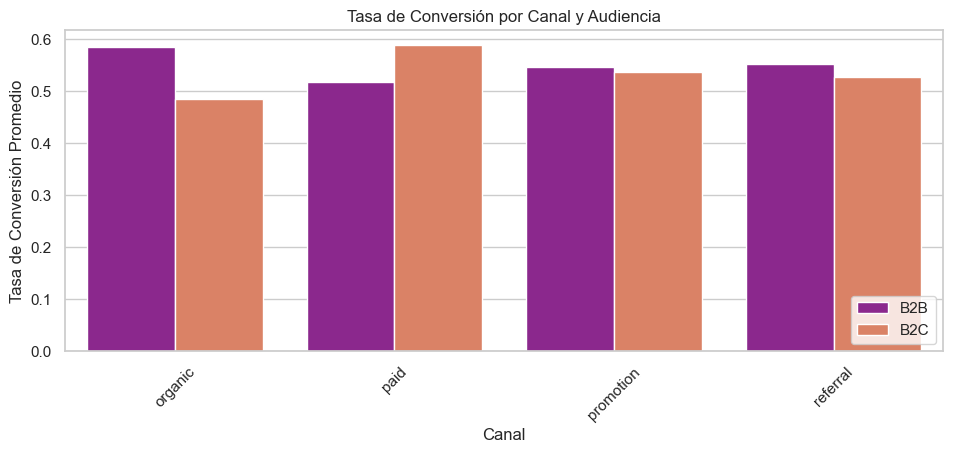

In [22]:
# Barras agrupadas: Tasa de conversión por canal y audiencia
audience_channel_summary = df.groupby(["target_audience", "channel"]).agg({
    "conversion_rate": "mean"
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=audience_channel_summary, x="channel", y="conversion_rate", hue="target_audience", palette=palette_colors)
plt.title("Tasa de Conversión por Canal y Audiencia")
plt.xlabel("Canal")
plt.ylabel("Tasa de Conversión Promedio")
plt.legend(loc=4) # Cambiar la posición de la leyenda a inferior derecha
plt.xticks(rotation=45)
plt.tight_layout()
plt.tight_layout(pad=2)
plt.savefig("../img/converionRate_channel_targetAudience.jpg")
plt.show()

In [23]:
# 4. Promedios generales por audiencia
audience_metrics = df.groupby("target_audience")[["conversion_rate", "roi", "revenue", "budget"]].mean().round(2)
print("Promedios generales por audiencia:\n")
audience_metrics.transpose()

Promedios generales por audiencia:



target_audience,B2B,B2C
conversion_rate,0.55,0.54
roi,0.54,0.53
revenue,521800.87,510861.65
budget,48880.10,50008.21


B2B logra ligeramente mejor conversión, especialmente en campañas más educativas o de alto valor (como webinars).

B2C obtiene mejor ROI, lo que indica mayor eficiencia en retorno por inversión, incluso con menor conversión.

Vale la pena segmentar estrategias según canal y tipo de campaña para maximizar el desempeño en cada audiencia.

## ¿Qué campaña tiene el mayor beneficio neto (net_profit)? ¿Qué características la hacen exitosa?

In [24]:
# Calcular el beneficio neto
df["net_profit"] = df["revenue"] - df["budget"]

# Ordenar por beneficio neto y seleccionar el Top 10
top_net_profit = df.sort_values(by="net_profit", ascending=False).head(10)

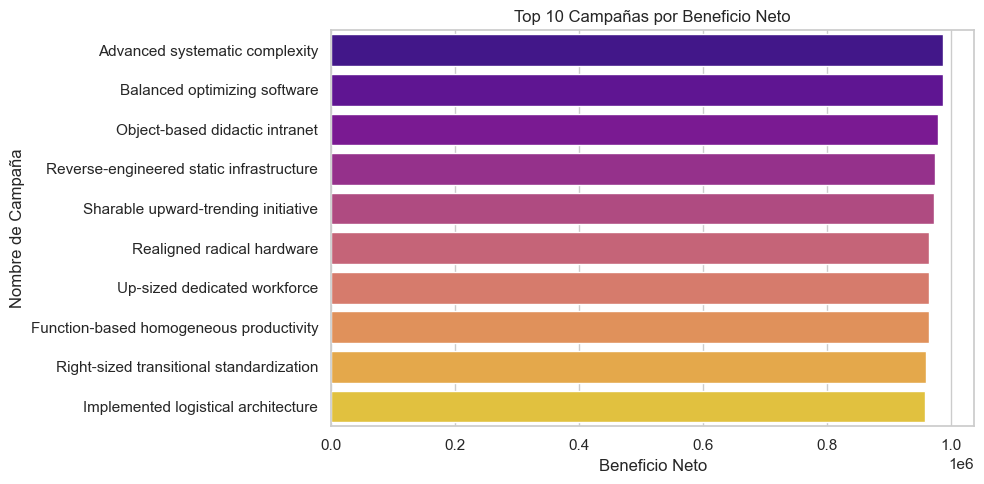

In [25]:
# Visualización: Top 10 campañas por beneficio neto
plt.figure(figsize=(10, 5))
sns.barplot(data=top_net_profit, x="net_profit", y="campaign_name", palette=palette_colors, hue="campaign_name")
plt.title("Top 10 Campañas por Beneficio Neto")
plt.xlabel("Beneficio Neto")
plt.ylabel("Nombre de Campaña")
plt.tight_layout()
plt.savefig("../img/top10channelName.jpg")
plt.show()

In [26]:
# Mostrar características clave de las campañas exitosas
top_characteristics = top_net_profit[[
    "campaign_name", "net_profit", "revenue", "budget", "roi",
    "conversion_rate", "type", "channel", "target_audience"
]]

# Mostrar tabla en consola
print("Top 10 campañas por beneficio neto:")
top_characteristics


Top 10 campañas por beneficio neto:


,campaign_name,net_profit,revenue,budget,roi,conversion_rate,type,channel,target_audience
492,Advanced systematic complexity,987859.73,989733.25,1873.52,0.95,0.54,podcast,organic,B2C
880,Balanced optimizing software,987359.82,997657.18,10297.36,0.95,0.71,podcast,paid,B2B
699,Object-based didactic intranet,979827.40,986258.10,6430.70,0.64,0.46,social media,paid,B2B
203,Reverse-engineered static infrastructure,974958.97,987205.29,12246.32,0.48,0.44,email,referral,B2B
193,Sharable upward-trending initiative,973355.11,994306.41,20951.30,0.58,0.24,social media,organic,B2C
170,Realigned radical hardware,965199.63,999712.49,34512.86,0.20,0.87,webinar,referral,B2B
902,Up-sized dedicated workforce,964497.81,990541.80,26043.99,0.28,0.25,email,organic,B2C
791,Function-based homogeneous productivity,963838.00,975549.34,11711.34,0.26,0.26,social media,organic,B2B
825,Right-sized transitional standardization,960202.70,970132.50,9929.80,0.97,0.65,email,promotion,B2C
907,Implemented logistical architecture,958135.52,973522.31,15386.79,0.23,0.98,webinar,organic,B2B


* Podcast es el tipo más frecuente entre los primeros lugares y presenta ROI muy alto.
* Canales orgánicos y pagados bien utilizados pueden ser altamente rentables.
* La tasa de conversión juega un papel clave en el éxito de estas campañas (algunas superan el 70%).
* Tanto B2B como B2C están representadas, lo que sugiere que la audiencia no limita el potencial si la estrategia es eficaz.

Están distribuidas entre diferentes canales y tipos, pero destacan:
* Podcast y Social Media
* Ambas audiencias (B2B y B2C) están representadas

## ¿Existe correlación entre el presupuesto (budget) y los ingresos (revenue)?

In [27]:
# Calcular correlación Pearson
correlation, p_value = stats.pearsonr(df["budget"], df["revenue"])
print(f"Coeficiente de correlación (r): {correlation:.4f}")
print(f"Valor p: {p_value:.4f}")

Coeficiente de correlación (r): -0.0144
Valor p: 0.6478


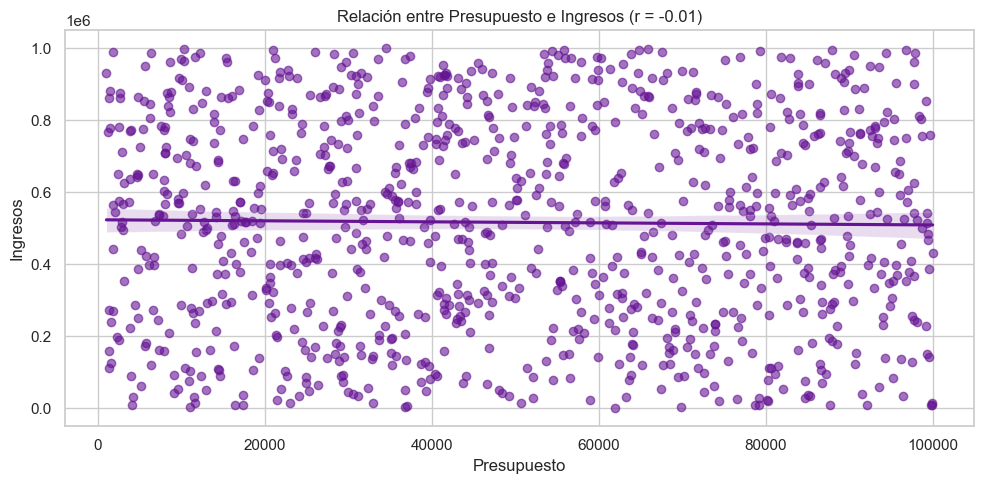

In [28]:
# Gráfico de dispersión con línea de tendencia global
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x="budget", y="revenue", scatter_kws={'alpha': 0.6}, color=graph_color[0])
plt.title(f"Relación entre Presupuesto e Ingresos (r = {correlation:.2f})")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

Resultado estadístico:
* Coeficiente de correlación (r): -0.01
* p-valor: 0.65

<Figure size 1000x500 with 0 Axes>

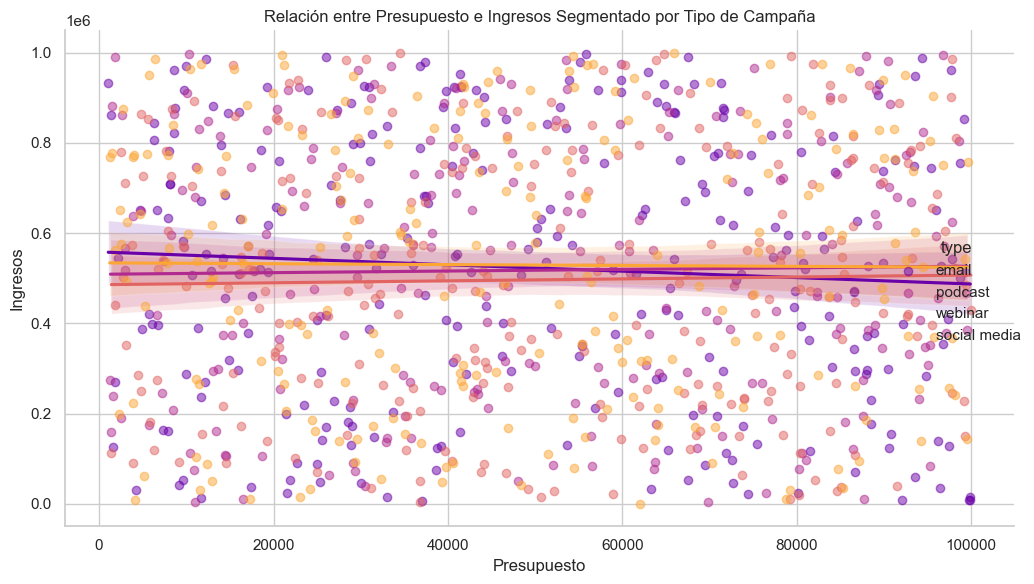

In [29]:
# Gráfico de dispersión segmentado por tipo de campaña
plt.figure(figsize=(10, 5))
sns.lmplot(data=df, x="budget", y="revenue", hue="type", height=6, aspect=1.5, scatter_kws={'alpha': 0.5}, palette=palette_colors)
plt.title("Relación entre Presupuesto e Ingresos Segmentado por Tipo de Campaña")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.savefig("../img/relation_budget_revenue.jpg")
plt.show()

**Resultado estadístico:**
* Coeficiente de correlación (r): -0.01
* p-valor: 0.65

**Interpretación:**
* No existe una correlación significativa entre el presupuesto y los ingresos generados.
* El coeficiente es prácticamente cero, lo que indica ausencia de relación lineal.
* Además, el p-valor alto (> 0.05) refuerza que esta falta de relación no es estadísticamente significativa.

 **Observaciones del gráfico:**
* En el gráfico general y los segmentados por tipo de campaña, se observa una gran dispersión: algunas campañas con bajo presupuesto generan altos ingresos, y viceversa.
* No se aprecia un punto óptimo claro de inversión; más bien, el rendimiento parece depender más de otros factores como canal, audiencia o contenido de la campaña.

#### **🔍 CONCLUSIÓN:**
Un mayor presupuesto no garantiza mayores ingresos. Las campañas exitosas lo son por su eficiencia y estrategia, no solo por cuánto se invierte.

## ¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?

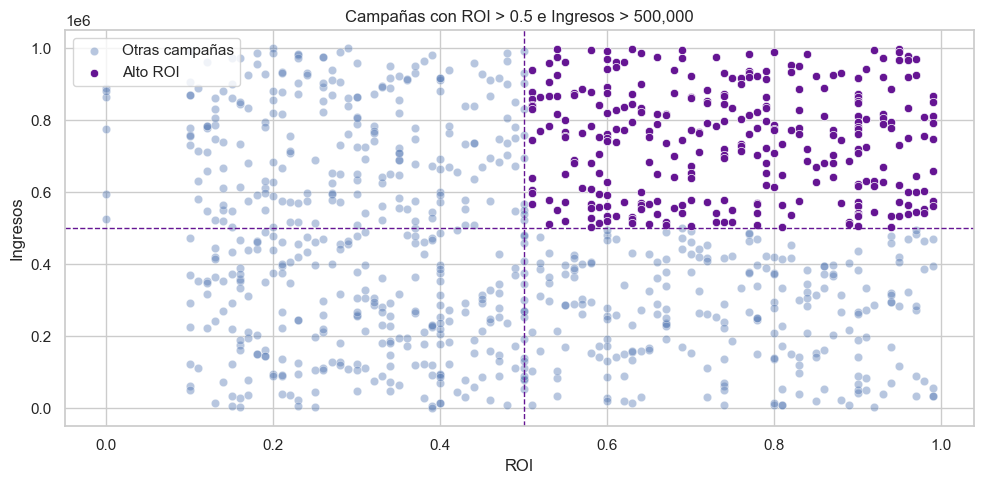

Campañas de alto ROI:


,roi,revenue,budget,net_profit,conversion_rate
count,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.746098,743962.314131,49690.243016,694272.071115,0.543770
std,0.145103,148217.637287,28297.275450,149218.558498,0.270378
min,0.510000,502557.550000,1223.820000,414225.750000,0.000000
25%,0.610000,601987.530000,26628.670000,554534.350000,0.300000
50%,0.740000,761292.130000,47906.320000,703680.750000,0.570000
75%,0.890000,865565.750000,75067.130000,823928.210000,0.780000
max,0.990000,997657.180000,99324.900000,987859.730000,0.990000


In [30]:
# Filtrar campañas con ROI > 0.5 e ingresos > 500,000
high_performance = df[(df["roi"] > 0.5) & (df["revenue"] > 500000)]

# Ordenar por ROI y revenue
high_performance_sorted = high_performance.sort_values(by=["roi", "revenue"], ascending=False)
high_performance_sorted.reset_index(drop=True, inplace=True)

# Cuadrante ROI vs Ingresos
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="roi", y="revenue", alpha=0.4, label="Otras campañas")
sns.scatterplot(data=high_performance_sorted, x="roi", y="revenue", color=graph_color[0], label="Alto ROI")
plt.axhline(500000, color=graph_color[0], linestyle='--', linewidth=1)
plt.axvline(0.5, color=graph_color[0], linestyle='--', linewidth=1)
plt.title("Campañas con ROI > 0.5 e Ingresos > 500,000")
plt.xlabel("ROI")
plt.ylabel("Ingresos")
plt.legend()
plt.tight_layout()
plt.savefig("../img/filtered_ROI_distribution.jpg")
plt.show()

# Imprimir tabla de alto ROI
cols_to_show = [
    "campaign_name", "roi", "revenue", "budget", "net_profit",
    "conversion_rate", "type", "channel", "target_audience"
]

print("Campañas de alto ROI:")
high_performance_sorted[cols_to_show].describe()

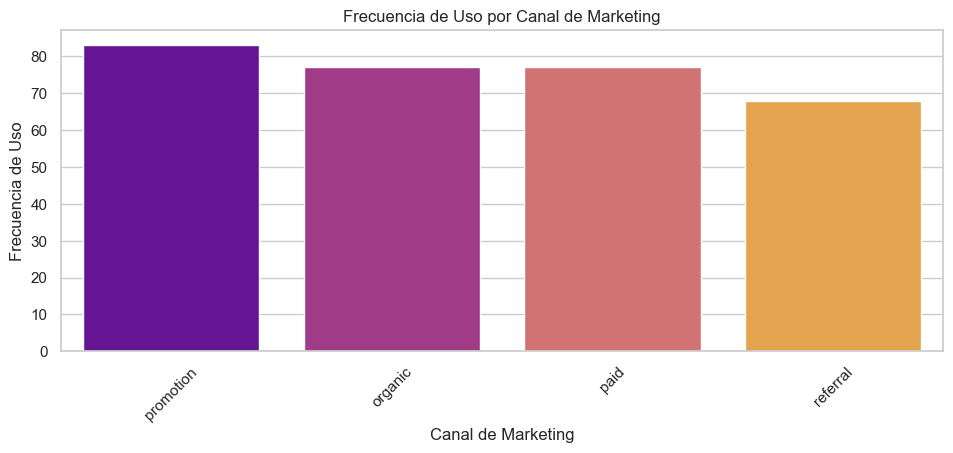

In [31]:
df_filtered = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Contar la frecuencia de cada canal de marketing
channel_counts = df_filtered["channel"].value_counts()

# Crear gráfico de barras para la frecuencia de uso de los canales
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("Frecuencia de Uso")
plt.title("Frecuencia de Uso por Canal de Marketing")
plt.xticks(rotation=45)
plt.tight_layout(pad=2)
plt.savefig("../img/filtered_channel_frecuency.jpg")
plt.show()

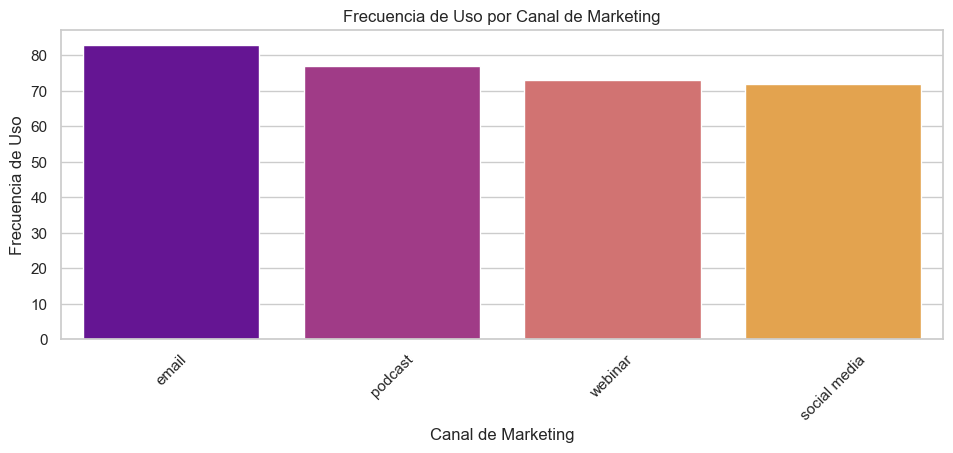

In [32]:
# Contar la frecuencia de cada canal de marketing
type_counts = df_filtered["type"].value_counts()

# Crear gráfico de barras para la frecuencia de uso de los canales
plt.figure(figsize=(10, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("Frecuencia de Uso")
plt.title("Frecuencia de Uso por Canal de Marketing")
plt.xticks(rotation=45)
plt.tight_layout(pad=2)
plt.savefig("../img/filtered_type_frecuency.jpg")
plt.show()

#### Características Clave

Predominan los canales promotion, organic y paid.

Los tipos más comunes son email, podcast, y webinar.

#### 🔍 Conclusión
Estas campañas representan los mejores casos de eficiencia y retorno. Puedes usarlas como referencia estratégica para crear nuevas campañas con alto potencial de éxito.

## ¿Existen patrones estacionales o temporales en el rendimiento de las campañas?

In [33]:
# Crear columnas temporales
df["start_month"] = df["start_date"].dt.month
df["start_quarter"] = df["start_date"].dt.to_period("Q")
df["start_year"] = df["start_date"].dt.year

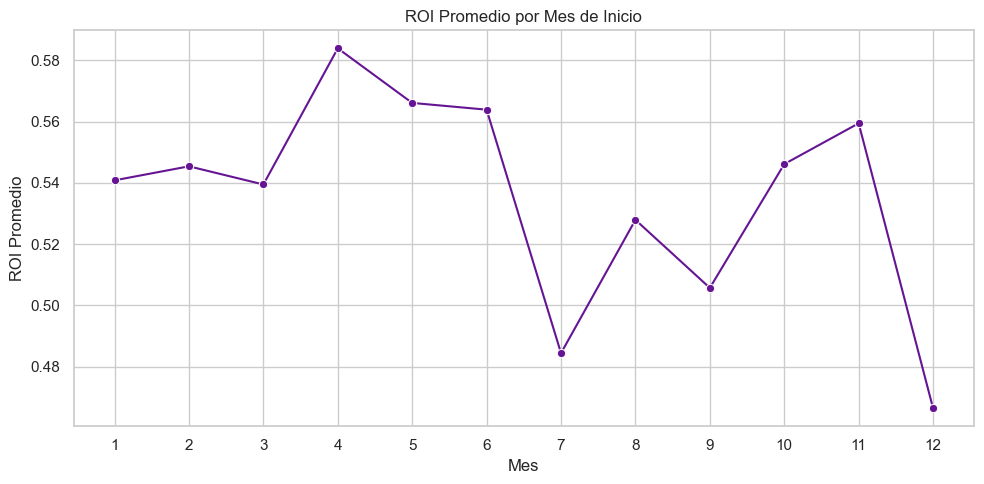

In [34]:
# ROI promedio por mes
monthly_roi = df.groupby("start_month")["roi"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_roi, x="start_month", y="roi", marker="o", color=graph_color[0])
plt.title("ROI Promedio por Mes de Inicio")
plt.xlabel("Mes")
plt.ylabel("ROI Promedio")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.savefig("../img/ROI_monthDistribution.jpg")
plt.show()

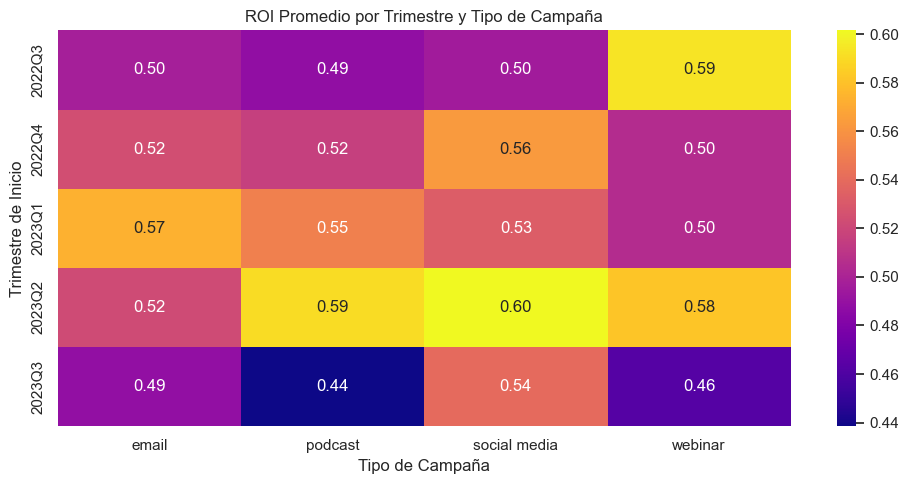

In [35]:
# Heatmap de ROI por trimestre y tipo de campaña
quarter_type_roi = df.groupby(["start_quarter", "type"])["roi"].mean().unstack()

plt.figure(figsize=(10, 5))
# sns.heatmap(quarter_type_roi, annot=True, fmt=".2f", cmap="YlGnBu")
sns.heatmap(quarter_type_roi, annot=True, fmt=".2f", cmap=palette_colors)
plt.title("ROI Promedio por Trimestre y Tipo de Campaña")
plt.xlabel("Tipo de Campaña")
plt.ylabel("Trimestre de Inicio")
plt.tight_layout()
plt.savefig("../img/ROI_quarterHeatmap.jpg")
plt.show()

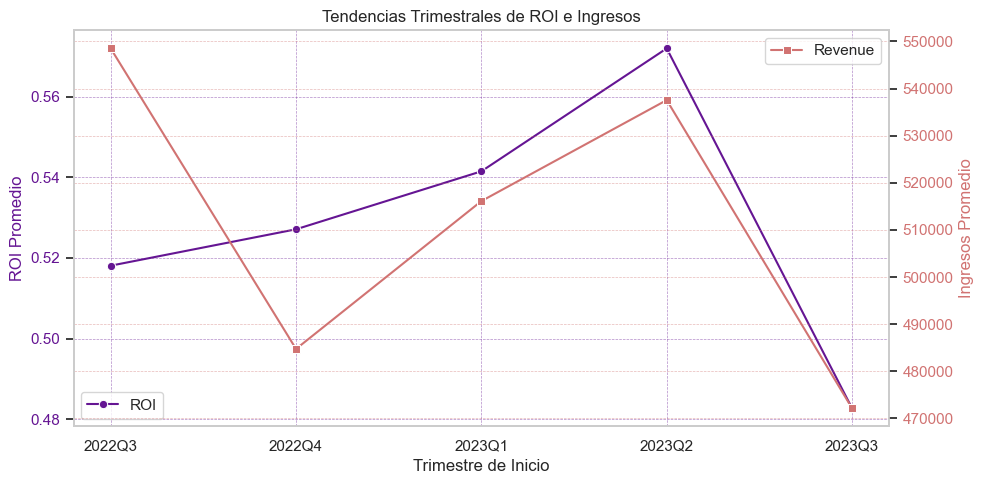

In [36]:
# Gráfico de líneas: ROI e Ingresos por trimestre

# Calcular promedios por trimestre
quarterly_perf = df.groupby("start_quarter")[["roi", "revenue"]].mean().reset_index()
quarterly_perf["start_quarter"] = quarterly_perf["start_quarter"].astype(str)

# Crear gráfico de líneas con doble eje
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=quarterly_perf, x="start_quarter", y="roi", marker="o", ax=ax1, label="ROI", color=graph_color[0])
plt.legend(loc=3)
ax1.set_ylabel("ROI Promedio", color=graph_color[0])
ax1.grid(color=graph_color[0], alpha=0.5, linestyle='dashed', linewidth=0.5)

ax1.tick_params(axis='y', labelcolor=graph_color[0])

ax2 = ax1.twinx()
sns.lineplot(data=quarterly_perf, x="start_quarter", y="revenue", marker="s", ax=ax2, label="Revenue", color=graph_color[2])
plt.legend(loc=1)
ax2.set_ylabel("Ingresos Promedio", color=graph_color[2])
ax2.grid(color=graph_color[2], alpha=0.5, linestyle='dashed', linewidth=0.5)

ax2.tick_params(axis='y', labelcolor=graph_color[2])

ax1.set_title("Tendencias Trimestrales de ROI e Ingresos")
ax1.set_xlabel("Trimestre de Inicio")
fig.tight_layout()
plt.savefig("../img/ROIAndRevenue_quarterMean.jpg")
plt.show()

#### Conclusiones preliminares:

**Tendencias Mensuales (Gráfico de líneas)**
* Ingresos tienen picos en algunos meses (por ejemplo, abril y noviembre), aunque no siguen una curva clara.

**ROI por Tipo de Campaña y Mes (Heatmap)**
* Algunos tipos como email y podcast muestran mayor rendimiento en ciertos trimestres.
* El comportamiento varía según el tipo, lo que sugiere que la estacionalidad no es universal, sino dependiente del tipo de campaña.

**Tendencias Trimestrales**
* Q1 y Q2 (primero y segundo trimestre) parecen ser los de mejor rendimiento tanto en ROI como ingresos.

**clusión**
Sí, hay ciertos patrones temporales, pero no son estrictamente lineales o uniformes. Algunos meses/trimestres y tipos de campaña tienden a rendir más.

In [37]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,start_month,start_quarter,start_year
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18,4,2023Q2,2023
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12,2,2023Q1,2023
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32,12,2022Q4,2022
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98,9,2022Q3,2022
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45,7,2023Q3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Up-sized user-facing secured line,2022-10-02,2023-10-29,11168.71,0.80,social media,B2C,promotion,0.20,277549.41,266380.70,10,2022Q4,2022
1000,Duplicate Campaign,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18,4,2023Q2,2023
1001,Inconsistent Decimal,2023-06-01,2023-12-01,12345.67,0.33,social media,B2C,referral,0.75,89000.00,76654.33,6,2023Q2,2023
1002,Broken-date campaign,2023-01-13,2024-01-01,25000.00,0.45,email,B2B,organic,0.62,87500.00,62500.00,1,2023Q1,2023


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_name    1004 non-null   object        
 1   start_date       1004 non-null   datetime64[ns]
 2   end_date         1004 non-null   datetime64[ns]
 3   budget           1004 non-null   float64       
 4   roi              1004 non-null   float64       
 5   type             1004 non-null   object        
 6   target_audience  1004 non-null   object        
 7   channel          1004 non-null   object        
 8   conversion_rate  1004 non-null   float64       
 9   revenue          1004 non-null   float64       
 10  net_profit       1004 non-null   float64       
 11  start_month      1004 non-null   int32         
 12  start_quarter    1004 non-null   period[Q-DEC] 
 13  start_year       1004 non-null   int32         
dtypes: datetime64[ns](2), float64(5), int32(

In [39]:
# Salvar nuevos campos calculados como un .csv
df.to_csv('../data/marketingcampaigns_final.csv', index=False)